In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import sqlalchemy as db
from scipy import stats
import statistics as st

In [2]:
collision = pd.read_csv('C:\\Users\\ASUS\\Desktop\\collision_data.csv')

In [3]:
collision

,Unnamed: 0,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,0,2,Matched,Intersection,Injury Collision,Angles,2,0,0,2,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Overcast,Wet,Daylight,10.0,Entering at angle,N
1,1,1,Matched,Block,Property Damage Only Collision,Other,3,0,0,3,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,23.0,From same direction - all others,N
2,2,1,Matched,Intersection,Property Damage Only Collision,Angles,2,0,0,2,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,10.0,Entering at angle,N
3,3,2,Matched,Intersection,Injury Collision,Cycles,3,0,1,1,...,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Daylight,5.0,Vehicle Strikes Pedalcyclist,N
4,4,2,Matched,Block,Injury Collision,Head On,2,0,0,2,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Dark - Street Lights On,30.0,From opposite direction - all others,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99971,99971,2,Matched,Block,Injury Collision,Head On,3,0,0,2,...,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,24.0,From opposite direction - both moving - head-on,N
99972,99972,1,Matched,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,...,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0.0,Raining,Wet,Daylight,13.0,From same direction - both going straight - bo...,N
99973,99973,2,Matched,Intersection,Injury Collision,Left Turn,3,0,0,2,...,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,28.0,From opposite direction - one left turn - one ...,N
99974,99974,2,Matched,Intersection,Injury Collision,Cycles,2,0,1,1,...,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Dusk,5.0,Vehicle Strikes Pedalcyclist,N


## __Nomor 1__

1. Menurut dataset collision, berapa perbandingan rasio kecelakaan antara kategori Injury Collision dengan Property Damage Collision? (Jawab pertanyaan ini menggunakan plot yang sesuai dan jelaskan ratio perbandingannya dalam markdown!)

In [4]:
col = collision["SEVERITYDESC"].value_counts(normalize=True)
coldf = pd.DataFrame(col)
coldf

,SEVERITYDESC
Property Damage Only Collision,0.675672
Injury Collision,0.324328


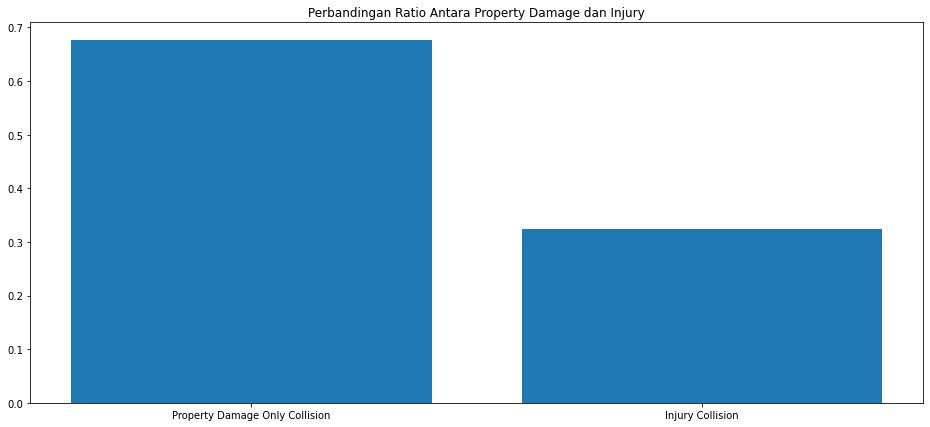

In [5]:
plt.figure(figsize=(16,7))
plt.bar(coldf.index, coldf['SEVERITYDESC'])
plt.title('Perbandingan Ratio Antara Property Damage dan Injury')
plt.show()

Menurut data ini, Property Damage Only Collision berada di ratio 0.675672 atau kurang lebih 68% dan Injury Collision adalah 0.324328 atau kurang lebih 32%

## __NOMOR 2__
Menggunakan kolom PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT. Hitunglah dan tampilkan dari tiap kolom tersebut hasil dari:

Data Central Tendency (Mean, Median dan Mode)
Data Dispersion (Persebaran data atau Standard Deviation)
IQR, Upper bound dan Lower Bound


In [6]:
collision.describe()

,Unnamed: 0,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE
count,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000,99976.000000
mean,49987.500000,1.324328,2.438305,0.044581,0.035919,1.964361,14.283308,0.050212,22.058154
std,28860.729593,0.468125,1.421063,0.216829,0.187214,0.584710,6.840410,0.218383,14.804548
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24993.750000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,0.000000,10.000000
50%,49987.500000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,0.000000,14.000000
75%,74981.250000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,0.000000,32.000000
max,99975.000000,2.000000,57.000000,6.000000,2.000000,12.000000,69.000000,1.000000,88.000000


In [7]:
medianperson = collision["PERSONCOUNT"].median()
meanperson = collision["PERSONCOUNT"].mean()
modeperson = collision["PERSONCOUNT"].mode()
medianped = collision["PEDCOUNT"].median()
meanped = collision["PEDCOUNT"].mean()
modeped = collision["PEDCOUNT"].mode()
medianpedcy = collision["PEDCYLCOUNT"].median()
meanpedcy = collision["PEDCYLCOUNT"].mean()
modepedcy = collision["PEDCYLCOUNT"].mode()
medianveh = collision["VEHCOUNT"].median()
meanveh = collision["VEHCOUNT"].mean()
modeveh = collision["VEHCOUNT"].mode()
print("Median, mean dan mode dari PERSONCOUNT: ",medianperson, meanperson, modeperson)
print("Median, mean dan mode dari PEDCOUNT: ",medianped, meanped, modeped)
print("Median, mean dan mode dari PEDCYLCOUNT: ",medianpedcy, meanpedcy, modepedcy)
print("Median, mean dan mode dari VEHCOUNT: ",medianveh, meanveh, modeveh)

Median, mean dan mode dari PERSONCOUNT:  2.0 2.438305193246379 0    2
dtype: int64
Median, mean dan mode dari PEDCOUNT:  0.0 0.04458069936784828 0    0
dtype: int64
Median, mean dan mode dari PEDCYLCOUNT:  0.0 0.03591862046891254 0    0
dtype: int64
Median, mean dan mode dari VEHCOUNT:  2.0 1.9643614467472192 0    2
dtype: int64


In [8]:
stdpers = collision["PERSONCOUNT"].std(ddof=1)
stdped = collision["PEDCOUNT"].std(ddof=1)
stdpedc = collision["PEDCYLCOUNT"].std(ddof=1)
stdpveh = collision["VEHCOUNT"].std(ddof=1)
print("STD dari PERSONCOUNT : ", stdpers)
print("STD dari PEDCOUNT : ", stdped)
print("STD dari PEDCYLCOUNT : ", stdpedc)
print("STD dari VEHCOUNT : ", stdpveh)

STD dari PERSONCOUNT :  1.421062813248801
STD dari PEDCOUNT :  0.21682894623920368
STD dari PEDCYLCOUNT :  0.18721358009008263
STD dari VEHCOUNT :  0.5847099022292137


In [9]:
Q1pers = np.quantile(collision["PERSONCOUNT"], 0.25)
Q3pers = np.quantile(collision["PERSONCOUNT"], 0.75)
IQRpers = Q3pers - Q1pers
Uppers = Q3pers + (1.5*IQRpers)
Lowpers = Q1pers - (1.5*IQRpers)
print("IQR Dari PERSONCOUNT: ", IQRpers)
print("Upper Boundaries dari PERSONCOUNT: ", Uppers)
print("Lower Boundaries dari PERSONCOUNT: ", Lowpers)

IQR Dari PERSONCOUNT:  1.0
Upper Boundaries dari PERSONCOUNT:  4.5
Lower Boundaries dari PERSONCOUNT:  0.5


In [10]:
Q1ped = np.quantile(collision["PEDCOUNT"], 0.25)
Q3ped = np.quantile(collision["PEDCOUNT"], 0.75)
IQRped = Q3ped - Q1ped
Upped = Q3ped + (1.5*IQRped)
Lowped = Q1ped - (1.5*IQRped)
print("IQR Dari PEDCOUNT: ", IQRped)
print("Upper Boundaries dari PEDCOUNT: ", Upped)
print("Lower Boundaries dari PEDCOUNT: ", Lowped)

IQR Dari PEDCOUNT:  0.0
Upper Boundaries dari PEDCOUNT:  0.0
Lower Boundaries dari PEDCOUNT:  0.0


In [11]:
Q1pedc = np.quantile(collision["PEDCYLCOUNT"], 0.25)
Q3pedc = np.quantile(collision["PEDCYLCOUNT"], 0.75)
IQRpedc = Q3pedc - Q1pedc
Uppedc = Q3pedc + (1.5*IQRpedc)
Lowpedc = Q1pedc - (1.5*IQRpedc)
print("IQR Dari PEDCYLCOUNT: ", IQRpedc)
print("Upper Boundaries dari PEDCYLCOUNT: ", Uppedc)
print("Lower Boundaries dari PEDCYLCOUNT: ", Lowpedc)

IQR Dari PEDCYLCOUNT:  0.0
Upper Boundaries dari PEDCYLCOUNT:  0.0
Lower Boundaries dari PEDCYLCOUNT:  0.0


In [12]:
Q1veh = np.quantile(collision["VEHCOUNT"], 0.25)
Q3veh = np.quantile(collision["VEHCOUNT"], 0.75)
IQRveh = Q3veh - Q1veh
Upveh = Q3veh + (1.5*IQRveh)
Lowveh = Q1veh - (1.5*IQRveh)
print("IQR Dari VEHCOUNT: ", IQRveh)
print("Upper Boundaries dari VEHCOUNT: ", Upveh)
print("Lower Boundaries dari VEHCOUNT: ", Lowveh)

IQR Dari VEHCOUNT:  0.0
Upper Boundaries dari VEHCOUNT:  2.0
Lower Boundaries dari VEHCOUNT:  2.0


## __Nomor 3__
Pada dataset di atas, terdapat kolom ADDRTYPE yang mana terdapat tiga grup "Block", "Intersection", "Alley". Anggaplah asumsi ketiga grup tersebut memenuhi syarat untuk menggunakan parametric test. Lakukanlah hypothesis testing untuk membuktikan apakah rata-rata korban (kolom PERSONCOUNT) antar kelompok sama atau tidak.


3. Hipotesis


$ \displaystyle H0: \mu_{1} = \mu_2 = \mu_3 $

$ \displaystyle H1: \mu_{1} \neq \mu_2 \neq \mu_3 $

In [13]:
a = collision[["ADDRTYPE", "PERSONCOUNT"]]
a

,ADDRTYPE,PERSONCOUNT
0,Intersection,2
1,Block,3
2,Intersection,2
3,Intersection,3
4,Block,2
...,...,...
99971,Block,3
99972,Block,2
99973,Intersection,3
99974,Intersection,2


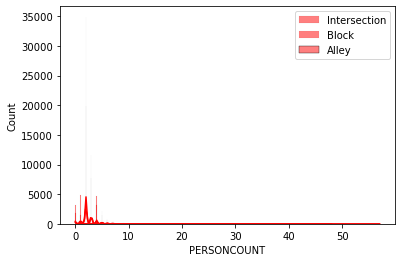

In [14]:
sns.histplot(a[a['ADDRTYPE'] == 'Intersection']['PERSONCOUNT'], color='red', kde=True, label='Intersection')
sns.histplot(a[a['ADDRTYPE'] == 'Block']['PERSONCOUNT'], color='red', kde=True, label='Block')
sns.histplot(a[a['ADDRTYPE'] == 'Alley']['PERSONCOUNT'], color='red', kde=True, label='Alley')
plt.legend()
plt.show()

In [15]:
for i in a['ADDRTYPE'].unique():
    print(f"Mean {i}: {a[a['ADDRTYPE'] == i]['PERSONCOUNT'].mean()}")

Mean Intersection: 2.516369450918749
Mean Block: 2.3927523590516215
Mean Alley: 2.0869565217391304


In [16]:
alpha = 0.05
fstats, pvalue = stats.stats.f_oneway(a[a['ADDRTYPE'] == 'Intersection']['PERSONCOUNT'],
                    a[a['ADDRTYPE'] == 'Block']['PERSONCOUNT'],
                    a[a['ADDRTYPE'] == 'Alley']['PERSONCOUNT'])
print("fstats: ",fstats)
print("pvalue: ",pvalue)

fstats:  88.92910585296646
pvalue:  2.5875831512211814e-39


Nilai pValue bernilai lebih kecil dari alpha, yang berarti kita dapat menolak H0, jadi hasilnya adalah rata2 korban antar kelompok tidak sama

## __NOMOR 4__
Menggunakan kolom INCDTTM buatlah 2 (dua) kolom baru yang tiap kolom hanya menyimpan value tahun dan kolom lainnya menyimpan value jam. Dan tampilkan dalam sebuah piechart kecelakaan apa (kolom SEVERITYDESC) yang sering terjadi pada pukul 00:00 dini hari!

In [17]:
collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99976 non-null  int64  
 1   SEVERITYCODE   99976 non-null  int64  
 2   STATUS         99976 non-null  object 
 3   ADDRTYPE       99976 non-null  object 
 4   SEVERITYDESC   99976 non-null  object 
 5   COLLISIONTYPE  99976 non-null  object 
 6   PERSONCOUNT    99976 non-null  int64  
 7   PEDCOUNT       99976 non-null  int64  
 8   PEDCYLCOUNT    99976 non-null  int64  
 9   VEHCOUNT       99976 non-null  int64  
 10  INCDATE        99976 non-null  object 
 11  INCDTTM        99976 non-null  object 
 12  JUNCTIONTYPE   99976 non-null  object 
 13  SDOT_COLCODE   99976 non-null  int64  
 14  SDOT_COLDESC   99976 non-null  object 
 15  UNDERINFL      99976 non-null  float64
 16  WEATHER        99976 non-null  object 
 17  ROADCOND       99976 non-null  object 
 18  LIGHTC

In [18]:
collision["INCDTTM"]

0        2013-03-27 14:54:00
1        2013-03-29 09:26:00
2        2019-04-20 17:42:00
3        2020-04-15 17:47:00
4        2013-03-31 02:09:00
                ...         
99971    2018-11-12 08:12:00
99972    2018-12-18 09:14:00
99973    2019-01-19 09:25:00
99974    2019-01-15 16:48:00
99975    2018-11-30 15:45:00
Name: INCDTTM, Length: 99976, dtype: object

In [19]:
c = collision["INCDTTM"].str.replace('-',' ')
c[0]

'2013 03 27 14:54:00'

In [20]:
data = c
tahun = []
for i in range(len(data)):
    ccc = data[i].split()
    tahun.append(ccc[0])


In [21]:
tahun

['2013',
 '2013',
 '2019',
 '2020',
 '2013',
 '2020',
 '2013',
 '2013',
 '2013',
 '2019',
 '2010',
 '2013',
 '2019',
 '2013',
 '2013',
 '2019',
 '2013',
 '2020',
 '2013',
 '2013',
 '2013',
 '2010',
 '2013',
 '2019',
 '2013',
 '2013',
 '2013',
 '2020',
 '2010',
 '2013',
 '2014',
 '2013',
 '2010',
 '2019',
 '2013',
 '2013',
 '2010',
 '2019',
 '2020',
 '2013',
 '2020',
 '2013',
 '2020',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2019',
 '2019',
 '2013',
 '2013',
 '2010',
 '2013',
 '2013',
 '2019',
 '2013',
 '2013',
 '2019',
 '2020',
 '2019',
 '2013',
 '2013',
 '2019',
 '2020',
 '2013',
 '2015',
 '2013',
 '2019',
 '2020',
 '2013',
 '2020',
 '2019',
 '2013',
 '2020',
 '2010',
 '2013',
 '2013',
 '2013',
 '2019',
 '2020',
 '2013',
 '2020',
 '2013',
 '2013',
 '2011',
 '2013',
 '2013',
 '2013',
 '2013',
 '2020',
 '2019',
 '2013',
 '2013',
 '2013',
 '2020',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2010',
 '2019',
 '2013',
 '2013',
 '2019',
 '2013',
 '2010',
 '2019',
 '2013',
 '2020',
 

In [22]:
collision["Tahun"]=tahun

In [23]:
collision

,Unnamed: 0,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,Tahun
0,0,2,Matched,Intersection,Injury Collision,Angles,2,0,0,2,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Overcast,Wet,Daylight,10.0,Entering at angle,N,2013
1,1,1,Matched,Block,Property Damage Only Collision,Other,3,0,0,3,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,23.0,From same direction - all others,N,2013
2,2,1,Matched,Intersection,Property Damage Only Collision,Angles,2,0,0,2,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,10.0,Entering at angle,N,2019
3,3,2,Matched,Intersection,Injury Collision,Cycles,3,0,1,1,...,51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Daylight,5.0,Vehicle Strikes Pedalcyclist,N,2020
4,4,2,Matched,Block,Injury Collision,Head On,2,0,0,2,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Dark - Street Lights On,30.0,From opposite direction - all others,N,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99971,99971,2,Matched,Block,Injury Collision,Head On,3,0,0,2,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,24.0,From opposite direction - both moving - head-on,N,2018
99972,99972,1,Matched,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,...,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0.0,Raining,Wet,Daylight,13.0,From same direction - both going straight - bo...,N,2018
99973,99973,2,Matched,Intersection,Injury Collision,Left Turn,3,0,0,2,...,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,28.0,From opposite direction - one left turn - one ...,N,2019
99974,99974,2,Matched,Intersection,Injury Collision,Cycles,2,0,1,1,...,51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Dusk,5.0,Vehicle Strikes Pedalcyclist,N,2019


In [24]:
c1 = collision["INCDTTM"].str.replace(':',' ')
c1[0]

'2013-03-27 14 54 00'

In [25]:
data1 = c1
jam = []
for i in range(len(data1)):
    cccc = data1[i].split()
    jam.append(cccc[1])


In [26]:
jam

['14',
 '09',
 '17',
 '17',
 '02',
 '14',
 '20',
 '16',
 '10',
 '09',
 '15',
 '14',
 '13',
 '17',
 '13',
 '19',
 '15',
 '07',
 '20',
 '02',
 '11',
 '10',
 '19',
 '07',
 '18',
 '10',
 '02',
 '13',
 '21',
 '18',
 '12',
 '12',
 '01',
 '14',
 '15',
 '17',
 '11',
 '00',
 '13',
 '06',
 '21',
 '18',
 '19',
 '10',
 '14',
 '17',
 '00',
 '18',
 '12',
 '11',
 '07',
 '16',
 '17',
 '16',
 '13',
 '07',
 '16',
 '19',
 '17',
 '23',
 '07',
 '11',
 '14',
 '12',
 '13',
 '07',
 '19',
 '17',
 '12',
 '19',
 '22',
 '00',
 '23',
 '11',
 '15',
 '18',
 '19',
 '16',
 '07',
 '08',
 '11',
 '09',
 '15',
 '19',
 '18',
 '17',
 '23',
 '20',
 '23',
 '17',
 '23',
 '05',
 '20',
 '16',
 '20',
 '11',
 '17',
 '21',
 '14',
 '09',
 '09',
 '22',
 '13',
 '14',
 '05',
 '22',
 '15',
 '01',
 '08',
 '23',
 '08',
 '10',
 '17',
 '03',
 '22',
 '00',
 '16',
 '04',
 '15',
 '13',
 '18',
 '03',
 '17',
 '18',
 '19',
 '14',
 '18',
 '10',
 '01',
 '13',
 '07',
 '03',
 '20',
 '20',
 '12',
 '23',
 '15',
 '13',
 '09',
 '23',
 '19',
 '12',
 '15',

In [27]:
collision["Jam"] = jam

In [28]:
collision

,Unnamed: 0,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,Tahun,Jam
0,0,2,Matched,Intersection,Injury Collision,Angles,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Overcast,Wet,Daylight,10.0,Entering at angle,N,2013,14
1,1,1,Matched,Block,Property Damage Only Collision,Other,3,0,0,3,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,23.0,From same direction - all others,N,2013,09
2,2,1,Matched,Intersection,Property Damage Only Collision,Angles,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,10.0,Entering at angle,N,2019,17
3,3,2,Matched,Intersection,Injury Collision,Cycles,3,0,1,1,...,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Daylight,5.0,Vehicle Strikes Pedalcyclist,N,2020,17
4,4,2,Matched,Block,Injury Collision,Head On,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Dark - Street Lights On,30.0,From opposite direction - all others,N,2013,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99971,99971,2,Matched,Block,Injury Collision,Head On,3,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,24.0,From opposite direction - both moving - head-on,N,2018,08
99972,99972,1,Matched,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0.0,Raining,Wet,Daylight,13.0,From same direction - both going straight - bo...,N,2018,09
99973,99973,2,Matched,Intersection,Injury Collision,Left Turn,3,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,28.0,From opposite direction - one left turn - one ...,N,2019,09
99974,99974,2,Matched,Intersection,Injury Collision,Cycles,2,0,1,1,...,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Dusk,5.0,Vehicle Strikes Pedalcyclist,N,2019,16


In [29]:
kecelakaan = collision.groupby(["Jam"])["SEVERITYDESC"]
kec = kecelakaan.value_counts().to_frame().rename({"SEVERITYDESC":"COUNT"}, axis=1).reset_index()
kec[kec["Jam"]== "00"]

,Jam,SEVERITYDESC,COUNT
0,00,Property Damage Only Collision,1854
1,00,Injury Collision,565


In [30]:
pp = kec[kec["Jam"]== "00"]
pp

,Jam,SEVERITYDESC,COUNT
0,00,Property Damage Only Collision,1854
1,00,Injury Collision,565


In [31]:
labelp = list(pp["SEVERITYDESC"])
labelp

['Property Damage Only Collision', 'Injury Collision']

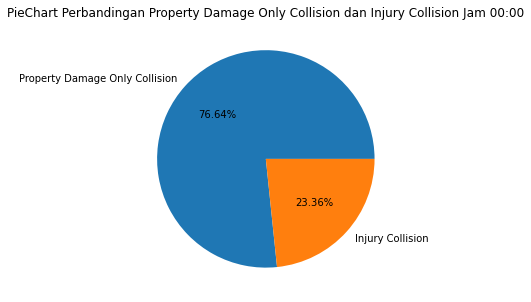

In [32]:
plt.figure(figsize=(10,5))
plt.title("PieChart Perbandingan Property Damage Only Collision dan Injury Collision Jam 00:00")
plt.pie(pp['COUNT'], labels=labelp,
       autopct='%.2f%%')
plt.show()

Pada jam 00 kecelakaan yang banyak terjadi adalah pada Property Damage Only Collision dengan ratio 76,64% peristiwa kecelakaan

## __NOMOR 5__
Saya memiliki asumsi bahwa, dari data tahun ke tahun, rasio kecelakaan yang terjadi akibat pengendara yang terpengaruh alkohol lebih sering terjadi pada pukul 20:00 malam. Apakah Anda setuju dengan asumsi saya? Jika iya, jelaskan alasannya. Jika tidak, jelaskan alasannya. Anda perlu menggunakan stackplot untuk menjawab pertanyaan ini.

In [33]:
collision["UNDERINFL"].unique()

array([0., 1.])

In [34]:
collision

,Unnamed: 0,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,Tahun,Jam
0,0,2,Matched,Intersection,Injury Collision,Angles,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Overcast,Wet,Daylight,10.0,Entering at angle,N,2013,14
1,1,1,Matched,Block,Property Damage Only Collision,Other,3,0,0,3,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,23.0,From same direction - all others,N,2013,09
2,2,1,Matched,Intersection,Property Damage Only Collision,Angles,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,10.0,Entering at angle,N,2019,17
3,3,2,Matched,Intersection,Injury Collision,Cycles,3,0,1,1,...,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Daylight,5.0,Vehicle Strikes Pedalcyclist,N,2020,17
4,4,2,Matched,Block,Injury Collision,Head On,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Dark - Street Lights On,30.0,From opposite direction - all others,N,2013,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99971,99971,2,Matched,Block,Injury Collision,Head On,3,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,24.0,From opposite direction - both moving - head-on,N,2018,08
99972,99972,1,Matched,Block,Property Damage Only Collision,Rear Ended,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0.0,Raining,Wet,Daylight,13.0,From same direction - both going straight - bo...,N,2018,09
99973,99973,2,Matched,Intersection,Injury Collision,Left Turn,3,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0.0,Clear,Dry,Daylight,28.0,From opposite direction - one left turn - one ...,N,2019,09
99974,99974,2,Matched,Intersection,Injury Collision,Cycles,2,0,1,1,...,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,0.0,Clear,Dry,Dusk,5.0,Vehicle Strikes Pedalcyclist,N,2019,16


In [35]:
infl = collision.groupby("UNDERINFL").get_group(1.0)
infl

,Unnamed: 0,SEVERITYCODE,STATUS,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,Tahun,Jam
47,47,1,Matched,Intersection,Property Damage Only Collision,Parked Car,4,0,0,4,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",1.0,Clear,Dry,Dusk,32.0,One parked--one moving,N,2013,18
53,53,2,Matched,Intersection,Injury Collision,Angles,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",1.0,Clear,Dry,Daylight,10.0,Entering at angle,N,2013,16
67,67,2,Matched,Block,Injury Collision,Parked Car,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",1.0,Clear,Dry,Daylight,32.0,One parked--one moving,N,2013,17
88,88,1,Matched,Block,Property Damage Only Collision,Other,1,0,0,1,...,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,1.0,Clear,Dry,Dark - Street Lights On,50.0,Fixed object,N,2013,23
97,97,1,Matched,Intersection,Property Damage Only Collision,Angles,3,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1.0,Clear,Dry,Dark - Street Lights On,10.0,Entering at angle,N,2013,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99940,99940,2,Matched,Block,Injury Collision,Head On,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1.0,Clear,Dry,Dark - Street Lights On,30.0,From opposite direction - all others,N,2019,06
99954,99954,1,Matched,Block,Property Damage Only Collision,Angles,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1.0,Raining,Wet,Dark - Street Lights On,10.0,Entering at angle,N,2018,18
99959,99959,2,Matched,Block,Injury Collision,Parked Car,6,0,0,6,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",1.0,Overcast,Wet,Dark - Street Lights On,32.0,One parked--one moving,Y,2018,00
99964,99964,2,Matched,Block,Injury Collision,Left Turn,2,0,0,2,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",1.0,Clear,Dry,Daylight,29.0,From opposite direction - one left turn - one ...,N,2019,17


## __NOMOR 6__
Berdasarkan jumlah laporan kecelakaan dari tahun ke tahun pada dataset ini, tahun 2011 adalah tahun di mana jumlah laporan kecelakaan tercatat paling banyak. Apakah Anda setuju dengan hal ini? Gunakan plot yang sesuai untuk mendukung jawaban Anda.

In [36]:
jmlh = collision["Tahun"].value_counts().to_frame()
jmlh

,Tahun
2015,11306
2014,11122
2016,10395
2017,10205
2010,10074
2018,9681
2013,9677
2012,9541
2019,8623
2011,7951


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


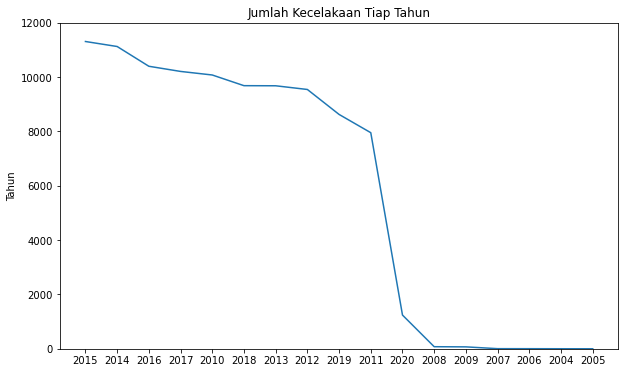

In [37]:
plt.figure(figsize=(10,6))
plt.title('Jumlah Kecelakaan Tiap Tahun')
sns.lineplot(jmlh.index, jmlh['Tahun'])
plt.ylim(0, 12000)
plt.show()

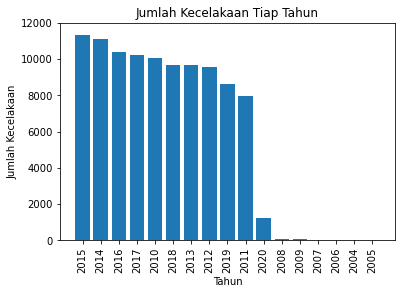

In [38]:
plt.bar(jmlh.index, jmlh['Tahun'])
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kecelakaan')
plt.title('Jumlah Kecelakaan Tiap Tahun')
plt.xticks(rotation = 90)
plt.ylim(0, 12000)
plt.show()

In [39]:
jmlhrat = collision["Tahun"].value_counts(normalize = True).to_frame()
jmlhrat

,Tahun
2015,0.113087
2014,0.111247
2016,0.103975
2017,0.102074
2010,0.100764
2018,0.096833
2013,0.096793
2012,0.095433
2019,0.086251
2011,0.079529


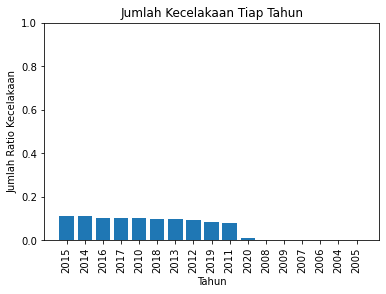

In [40]:
plt.bar(jmlhrat.index, jmlhrat['Tahun'])
plt.xlabel('Tahun')
plt.ylabel('Jumlah Ratio Kecelakaan')
plt.title('Jumlah Kecelakaan Tiap Tahun')
plt.xticks(rotation = 90)
plt.ylim(0, 1)
plt.show()

Berdasarkan data kecelakaan ini, jumlah kecelakaan yang terbesar sesuai asumsi adalah 2011, saya tidak setuju karena menurut plot data ini, jumlah kecelakaan yang terbesar berada di tahun 2015 dengan 11306 kasus dan ratio 11% sedangkan pada 2011 hanya 7951 kasus dengan ratio 7%